<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2'

In [9]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [11]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.775329,20.267232,65.759543,-0.002699,187.799404,187.802167,-0.002763
1,0.0,1.0,97.782076,44.502668,78.483007,0.000491,230.768242,230.767812,0.000431
2,0.0,2.0,43.114231,83.420544,34.118264,-0.000243,170.652796,170.653013,-0.000217
3,0.0,3.0,56.042415,60.297416,24.740782,0.000258,151.080871,151.080587,0.000283
4,0.0,4.0,44.165499,30.793449,65.555487,0.000465,150.514900,150.514507,0.000394
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.647884,22.649264,47.504204,0.001824,140.803175,140.801856,0.001319
59996,999.0,56.0,68.068817,90.808650,78.009626,0.000095,246.887187,246.886983,0.000204
59997,999.0,57.0,32.044819,50.306987,83.811518,0.000043,176.163368,176.163571,-0.000204
59998,999.0,58.0,93.471450,22.624272,35.841776,-0.000514,161.936984,161.937981,-0.000997


In [12]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.775329,20.267232,65.759543,-0.002699,187.799404,187.802167,-0.002763
1,0.0,1.0,97.782076,44.502668,78.483007,0.000491,230.768242,230.767812,0.000431
2,0.0,2.0,43.114231,83.420544,34.118264,-0.000243,170.652796,170.653013,-0.000217
3,0.0,3.0,56.042415,60.297416,24.740782,0.000258,151.080871,151.080587,0.000283
4,0.0,4.0,44.165499,30.793449,65.555487,0.000465,150.514900,150.514507,0.000394
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.647884,22.649264,47.504204,0.001824,140.803175,140.801856,0.001319
59996,999.0,56.0,68.068817,90.808650,78.009626,0.000095,246.887187,246.886983,0.000204
59997,999.0,57.0,32.044819,50.306987,83.811518,0.000043,176.163368,176.163571,-0.000204
59998,999.0,58.0,93.471450,22.624272,35.841776,-0.000514,161.936984,161.937981,-0.000997


In [13]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.775329  20.267232  65.759543  ...  187.799404  187.802167 -0.002763
      1.0    97.782076  44.502668  78.483007  ...  230.768242  230.767812  0.000431
      2.0    43.114231  83.420544  34.118264  ...  170.652796  170.653013 -0.000217
      3.0    56.042415  60.297416  24.740782  ...  151.080871  151.080587  0.000283
      4.0    44.165499  30.793449  65.555487  ...  150.514900  150.514507  0.000394
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   60.647884  22.649264  47.504204  ...  140.803175  140.801856  0.001319
      56.0   68.068817  90.808650  78.009626  ...  246.887187  246.886983  0.000204
      57.0   32.044819  50.306987  83.811518  ...  176.163368  176.163571 -0.000204
      58.0   93.471450  22.624272  35.841776  ...  161.936984  161.937981 -0.000997
      59.0   64.099818  78.122672  74.080279  ...  226.302875  226.302773  0.000102

[60000 rows x 7 columns]

In [14]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.775329  20.267232  65.759543  ...  187.799404  187.802167 -0.002763
      1.0    97.782076  44.502668  78.483007  ...  230.768242  230.767812  0.000431
      2.0    43.114231  83.420544  34.118264  ...  170.652796  170.653013 -0.000217
      3.0    56.042415  60.297416  24.740782  ...  151.080871  151.080587  0.000283
      4.0    44.165499  30.793449  65.555487  ...  150.514900  150.514507  0.000394
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   60.647884  22.649264  47.504204  ...  140.803175  140.801856  0.001319
      56.0   68.068817  90.808650  78.009626  ...  246.887187  246.886983  0.000204
      57.0   32.044819  50.306987  83.811518  ...  176.163368  176.163571 -0.000204
      58.0   93.471450  22.624272  35.841776  ...  161.936984  161.937981 -0.000997
      59.0   64.099818  78.122672  74.080279  ...  226.302875  226.302773  0.000102

[60000 rows x 7 columns]

In [15]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.775329,20.267232,65.759543,-0.002699,187.799404,187.802167,-0.002763
1,0.0,1.0,97.782076,44.502668,78.483007,0.000491,230.768242,230.767812,0.000431
2,0.0,2.0,43.114231,83.420544,34.118264,-0.000243,170.652796,170.653013,-0.000217
3,0.0,3.0,56.042415,60.297416,24.740782,0.000258,151.080871,151.080587,0.000283
4,0.0,4.0,44.165499,30.793449,65.555487,0.000465,150.514900,150.514507,0.000394
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.647884,22.649264,47.504204,0.001824,140.803175,140.801856,0.001319
59996,999.0,56.0,68.068817,90.808650,78.009626,0.000095,246.887187,246.886983,0.000204
59997,999.0,57.0,32.044819,50.306987,83.811518,0.000043,176.163368,176.163571,-0.000204
59998,999.0,58.0,93.471450,22.624272,35.841776,-0.000514,161.936984,161.937981,-0.000997


In [16]:
table.set_index(['rep', 'index'], inplace=True)

In [17]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.775329  20.267232  65.759543  ...  187.799404  187.802167 -0.002763
      1.0    97.782076  44.502668  78.483007  ...  230.768242  230.767812  0.000431
      2.0    43.114231  83.420544  34.118264  ...  170.652796  170.653013 -0.000217
      3.0    56.042415  60.297416  24.740782  ...  151.080871  151.080587  0.000283
      4.0    44.165499  30.793449  65.555487  ...  150.514900  150.514507  0.000394
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   60.647884  22.649264  47.504204  ...  140.803175  140.801856  0.001319
      56.0   68.068817  90.808650  78.009626  ...  246.887187  246.886983  0.000204
      57.0   32.044819  50.306987  83.811518  ...  176.163368  176.163571 -0.000204
      58.0   93.471450  22.624272  35.841776  ...  161.936984  161.937981 -0.000997
      59.0   64.099818  78.122672  74.080279  ...  226.302875  226.302773  0.000102

[60000 rows x 7 columns]

In [18]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

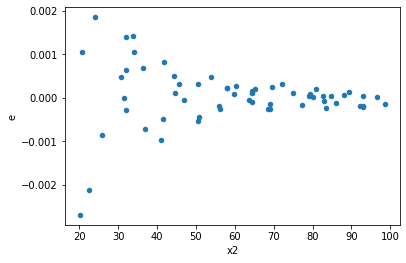

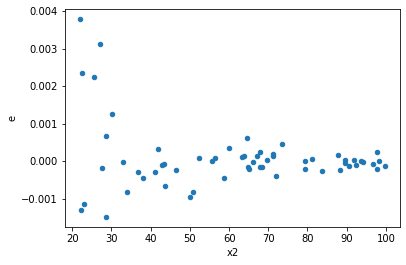

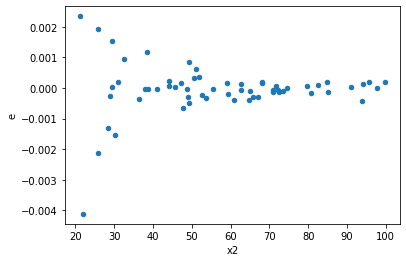

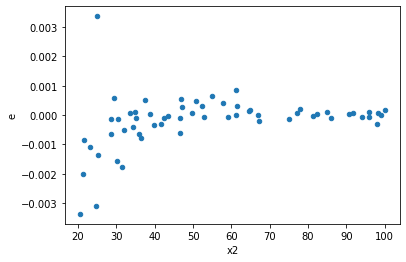

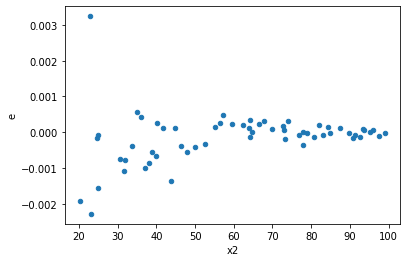

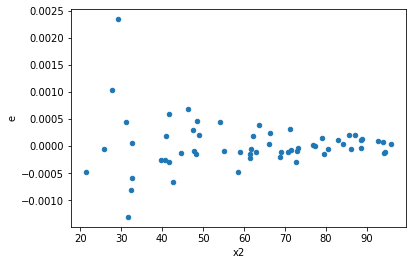

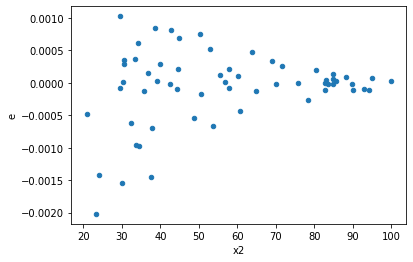

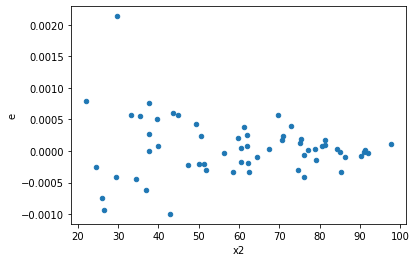

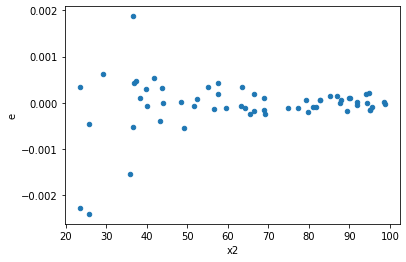

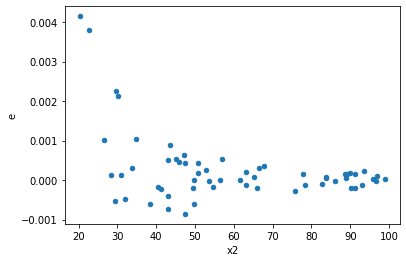

In [19]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [20]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [21]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [22]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,5.867332059014643e-07,2.5937626071106866e-05,2.9336660295073215e-08,1.2968813035553432e-06,0.0226209293129973,1.2402892943587594e-12,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,7.6540333857737e-07,3.157731446303508e-05,3.82701669288685e-08,1.5788657231517539e-06,0.0242390257560808,2.485578587924661e-12,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,6.774790951332789e-07,3.937905270504759e-05,3.387395475666394e-08,1.9689526352523798e-06,0.017204047548011227,7.752696858369996e-14,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,9.550650507164853e-07,3.340048773362511e-05,4.7753252535824266e-08,1.6700243866812557e-06,0.028594344439916583,1.2992367417129652e-11,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,4.2885225958269193e-07,2.2177299566118163e-05,2.1442612979134595e-08,1.1088649783059082e-06,0.019337442699194993,2.5415344302484165e-13,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,3.841637680462378e-07,1.1437383225574857e-05,1.920818840231189e-08,5.718691612787429e-07,0.033588431940202765,6.419341067576505e-11,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,6.843634025863131e-07,1.271098565894126e-05,3.421817012931566e-08,6.35549282947063e-07,0.05384030955183346,6.280891323464351e-09,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,9.474767194790537e-07,8.350513395740244e-06,4.737383597395269e-08,4.1752566978701216e-07,0.11346328957000174,5.51718050998405e-06,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,2.970059584897951e-07,1.4253530433498308e-05,1.4850297924489755e-08,7.126765216749155e-07,0.02083736095246822,5.414108110585902e-13,Reject005=0 : Heteroscedasticity


In [23]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64